# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [3]:
data = pd.DataFrame(y_train)
labels = pd.read_csv('signnames.csv')

#Counts for traffic signs
counts = data[0].value_counts()

x_axis = np.arange(0,43)
y_axis = [counts[i] for i in x_axis]
X_label = [labels['SignName'][i] for i in x_axis]


signCounts =  pd.DataFrame(y_axis)
labels.insert(2, 'SignCounts', signCounts)

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = labels.shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
import tensorflow as tf
import cv2

In [6]:
def display_state(x_axis, y_axis, X_label, file_path):
    
    """
    Display distribution of the the dataset
    """
    path = 'output_images/'

    plt.figure(figsize=(20, 10))
    plt.bar(x_axis, y_axis, width = 0.5)
    plt.xlim(-1, 43)
    show_ticks = plt.xticks(x_axis ,X_label, fontsize=12 ,rotation = 270) 
    plt.title('The distribution of the Training set')

    
    plt.savefig(file_path, bbox_inches = 'tight')

In [7]:
labels

,ClassId,SignName,SignCounts
0,0,Speed limit (20km/h),180
1,1,Speed limit (30km/h),1980
2,2,Speed limit (50km/h),2010
3,3,Speed limit (60km/h),1260
4,4,Speed limit (70km/h),1770
5,5,Speed limit (80km/h),1650
6,6,End of speed limit (80km/h),360
7,7,Speed limit (100km/h),1290
8,8,Speed limit (120km/h),1260
9,9,No passing,1320


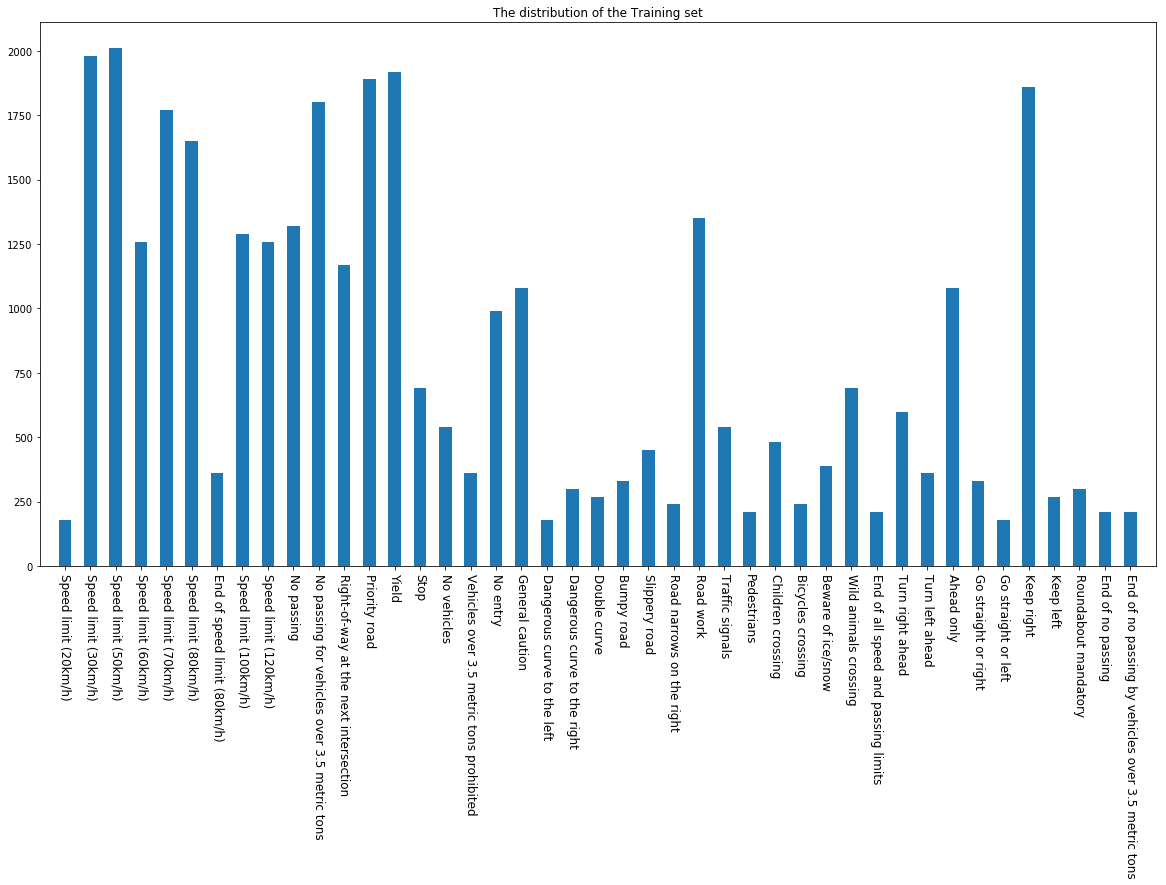

In [8]:
file_path = 'output_images/traffic_signs.jpg'
display_state(x_axis, y_axis, X_label, file_path)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
#######################
# Process the data
#######################

# normalizetion
def to_normalizer(img, std=128, mean=128):
    '''
        Normalization of images.   
    '''
    return (img - mean)/std

# Grayscale
def to_gray2rgb(img):
    '''
        Grayscale changes to images.
    '''
    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Histogram Equalization
def to_hist(img):
    '''
        Histogram Equalization
    '''
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    equ = cv2.equalizeHist(img)
    
    return equ
    

In [10]:
#######################
# Image visualization
#######################

def show_3_channel(data, random_data, file_path):
    
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 10))
    
    ax1.imshow(data[random_data[0]])
    ax2.imshow(data[random_data[1]])
    ax3.imshow(data[random_data[2]])
    ax4.imshow(data[random_data[3]])
    ax5.imshow(data[random_data[4]])
    
    f.savefig(file_path, bbox_inches = 'tight')

def show_1_channel(data, randow_data, file_path):
    
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 10))
    
    ax1.imshow(data[random_data[0]].reshape(32, 32))
    ax2.imshow(data[random_data[1]].reshape(32, 32))
    ax3.imshow(data[random_data[2]].reshape(32, 32))
    ax4.imshow(data[random_data[3]].reshape(32, 32))
    ax5.imshow(data[random_data[4]].reshape(32, 32))
    
    
    #f.savefig(file_path, bbox_inches = 'tight')

In [11]:
# RGB for images.

X_train_rgb = X_train
X_valid_rgb = X_valid
X_test_rgb = X_test

y_train_rgb = y_train

In [12]:
#  Normalization of  images.  
X_train_normal = np.array([to_normalizer(img) for img in X_train])
X_valid_normal = np.array([to_normalizer(img) for img in X_valid])
X_test_normal = np.array([to_normalizer(img) for img in X_test])

y_train_normal = y_train

In [13]:
# Grayscale changes to images.
X_train_gray = np.array([to_gray2rgb(img)[:,:, np.newaxis] for img in X_train])
X_valid_gray = np.array([to_gray2rgb(img)[:,:, np.newaxis] for img in X_valid])
X_test_gray = np.array([to_gray2rgb(img)[:,:, np.newaxis] for img in X_test]) 

y_train_gray = y_train

In [14]:
#  Histogram Equalization
X_train_hist = np.array([to_hist(img)[:,:, np.newaxis] for img in X_train])
X_valid_hist = np.array([to_hist(img)[:,:, np.newaxis] for img in X_valid])
X_test_hist = np.array([to_hist(img)[:,:, np.newaxis] for img in X_test])

y_train_hist = y_train

In [17]:
print("Normalizer Image data shape =", X_train_normal.shape[1:])
print("Grayscale Image data shape =", X_train_gray.shape[1:])
print("Histogram Equalization Image data shape =", X_train_hist.shape[1:])

Normalizer Image data shape = (32, 32, 3)
Grayscale Image data shape = (32, 32, 1)
Histogram Equalization Image data shape = (32, 32, 1)


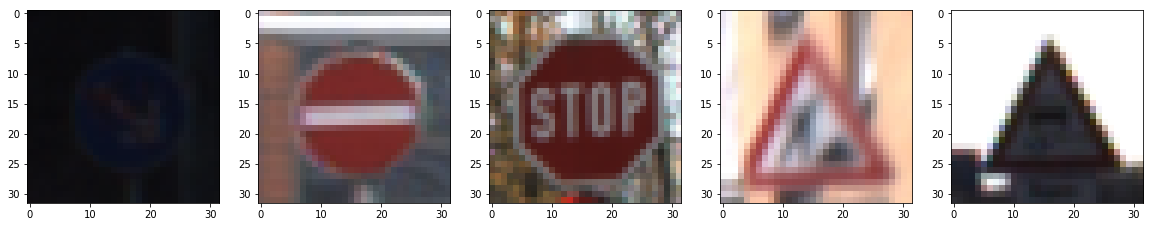

In [20]:
random_data = np.random.choice(len(X_train), 5)
file_path = 'output_images/rgb_im.jpg'
show_3_channel(X_train_rgb, random_data, file_path)

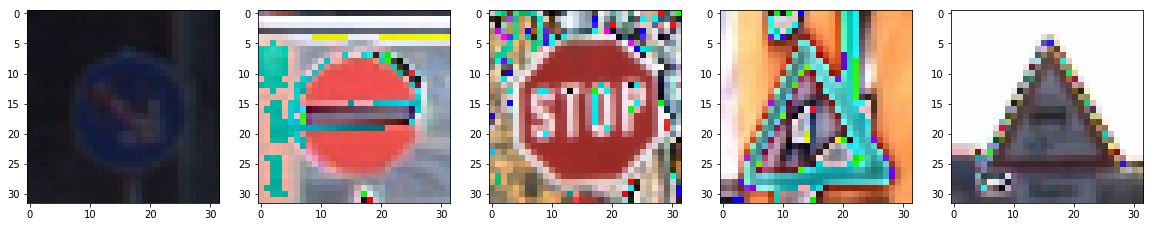

In [21]:
file_path = 'output_images/normal_im.jpg'
show_3_channel(X_train_normal, random_data, file_path)

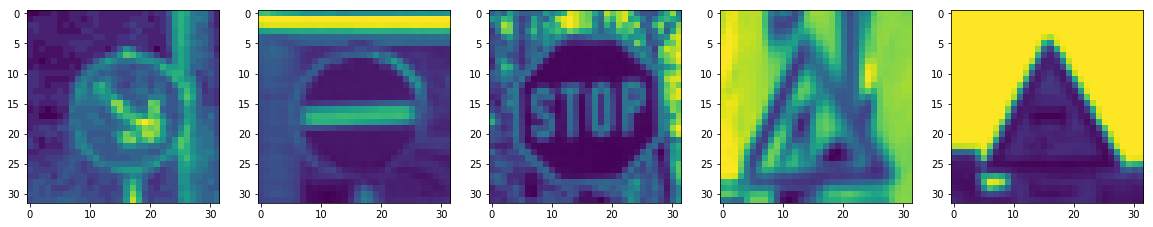

In [22]:
file_path = 'output_images/gray_im.jpg'
show_1_channel(X_train_gray, random_data, file_path)

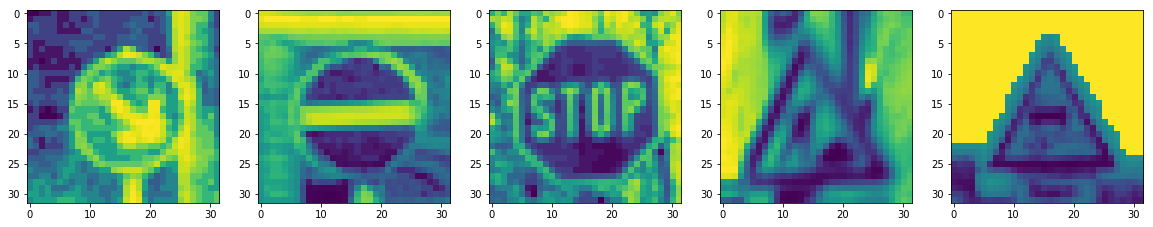

In [23]:
file_path = 'output_images/hist_im.jpg'
show_1_channel(X_train_hist, random_data, file_path)

### Model Architecture

In [15]:
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [16]:
############################
# Information visualization
###########################
def display_loss_and_acc(data1, data2, data3, data4, file_path):
    
    X = np.arange(0, len(data1))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
    l1, = ax1.plot(X, data1)
    l2, = ax1.plot(X, data2, color='red')
    ax1.set_xlabel('Epoches')
    ax1.set_ylabel('Loss')
    ax1.legend(handles=[l1, l2], labels=['Train Loss', 'Valid Loss'],  loc='best')
    
    la1, = ax2.plot(X, data3)
    la2, = ax2.plot(X, data4, color='red')
    ax2.set_xlabel('Epoches')
    ax2.set_ylabel('Accuracy')
    ax2.legend(handles=[la1, la2], labels=['Train acc', 'Valid acc'],  loc='best')
    
    f.savefig(file_path, bbox_inches = 'tight')

####  LeNet source : Yann Lecun

**Using the infamous LeNet neural network architecture as the first classifier model.**

In [17]:
###############################
# building model
##############################
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    #Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #  Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#Model evaluate
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [18]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

#Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32)
#keep_prob_fully = tf.placeholder(tf.float32, name='keep_prob_fully')
one_hot_y = tf.one_hot(y, 43)

# Model
learning_rate = 0.001
logits = LeNet(x)

# Name logits Tensor, so that is can be loaded from disk after training
#logits = tf.identity(logits, name='logits')

# Loss 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
predict= tf.argmax(logits, 1) 
label = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predict, label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

saver = tf.train.Saver()

In [20]:
# Training the model

save_file= './lenet_model'
EPOCHS = 20
BATCH_SIZE = 128
lenet_train_loss, lenet_train_acc, lenet_valid_loss, lenet_valid_acc = [], [], [], []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    #print(X_train.shape)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train_gray = shuffle(X_train_gray, y_train_gray)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train_gray[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        train_loss = sess.run(loss_operation, feed_dict={x:X_train_gray, y:y_train_gray})
        lenet_train_loss.append(train_loss)
        train_accuracy = evaluate(X_train_gray, y_train_gray)
        lenet_train_acc.append(train_accuracy)
        valid_loss = sess.run(loss_operation, feed_dict={x:X_valid_gray, y:y_valid})
        lenet_valid_loss.append(valid_loss)
        valid_accuracy = evaluate(X_valid_gray, y_valid)
        lenet_valid_acc.append(valid_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Loss = {:.3f} Train Accuracy = {:.3f}".format(train_loss, train_accuracy))
        print("Validation Loss = {} Validation Accuracy = {:.3f}".format(valid_loss, valid_accuracy))
        
        print()

    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Train Loss = 0.841 Train Accuracy = 0.785
Validation Loss = 1.2686305046081543 Validation Accuracy = 0.717

EPOCH 2 ...
Train Loss = 0.400 Train Accuracy = 0.898
Validation Loss = 0.9045286178588867 Validation Accuracy = 0.817

EPOCH 3 ...
Train Loss = 0.263 Train Accuracy = 0.933
Validation Loss = 0.751365602016449 Validation Accuracy = 0.848

EPOCH 4 ...
Train Loss = 0.194 Train Accuracy = 0.950
Validation Loss = 0.701261579990387 Validation Accuracy = 0.852

EPOCH 5 ...
Train Loss = 0.120 Train Accuracy = 0.971
Validation Loss = 0.7732948064804077 Validation Accuracy = 0.868

EPOCH 6 ...
Train Loss = 0.160 Train Accuracy = 0.959
Validation Loss = 0.8198726773262024 Validation Accuracy = 0.865

EPOCH 7 ...
Train Loss = 0.086 Train Accuracy = 0.976
Validation Loss = 0.7542007565498352 Validation Accuracy = 0.880

EPOCH 8 ...
Train Loss = 0.061 Train Accuracy = 0.983
Validation Loss = 0.7889572978019714 Validation Accuracy = 0.885

EPOCH 9 ...
Train Loss = 0.05

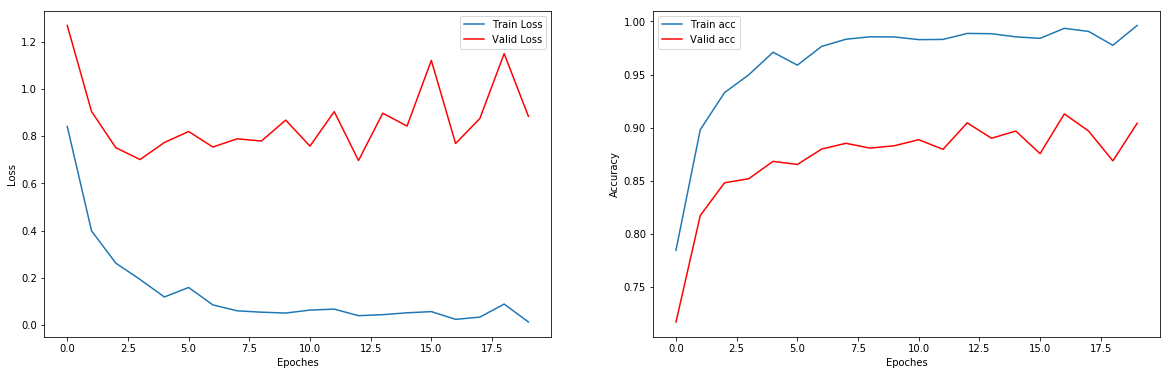

In [21]:
file_path = 'output_images/lenet.jpg'
display_loss_and_acc(lenet_train_loss, lenet_valid_loss, lenet_train_acc, lenet_valid_acc, file_path)

**High Loss value on the validation indicates under fitting of the model. Next, I will improve the complexity of the model to extract more features.**

### Improve LeNet

In [22]:
##############################
# Model basic components
# Layers: -- conv2d_layer()
#         -- fully_layer()
#############################
def conv2d_layer(x_tensor, output_dim, conv_ksize=(3, 3)):
    """
    Apply convolution  to tensor
    
    Args:
        x_tensor -- Tensorflow tensor
        output_dim -- Number of outputs for the convolution layer
        conv_ksize -- kernal size 2-D Tuple for the convolutional layer

    return: A tensor that represents convolution  of x_tensor
    """
    mu = 0
    sigma = 0.1
    
    input_dim = x_tensor.get_shape().as_list()[-1]
    weights   = tf.Variable(tf.truncated_normal(shape=[conv_ksize[0], conv_ksize[1], input_dim, output_dim], mean=mu, stddev=sigma))
    bias      = tf.Variable(tf.zeros(output_dim))
    conv      = tf.nn.conv2d(x_tensor, weights, strides=[1, 1, 1, 1], padding='VALID') + bias
    
    return conv


def fully_layer(x_tensor, output_dim):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : output_dim: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    mu = 0
    sigma = 0.1
    
    input_dim = x_tensor.get_shape().as_list()[-1]
    weights   = tf.Variable(tf.truncated_normal(shape=[input_dim, output_dim], mean=mu, stddev=sigma))
    bias      = tf.Variable(tf.zeros(output_dim))
    fc        = tf.matmul(x_tensor, weights) + bias
    
    return fc

**Improved leNet_1() consisted of the following layers:**

 | Layer                            | Description          |
 | :--------                         |:-----------          |
 | Input                            |   32x32x1 image \ 32x32x3 image  |
 | Convolution 3x3|  1x1 stride, valid padding, outputs 30x30x32        |
 | dropout      |                                      |
 | RELU        |                                      |
 | Max pooling   |  2x2 stride, valid padding, outputs 15x15x32        |
 | Convolution 3x3|  1x1 stride, valid padding, outputs 13x13x64        |
 | Dropout      |                                      |
 | RELU        |                                      |
 | Max pooling   |  2x2 stride, valid padding, outputs 6x6x64         |
 | Convolution 3x3|  1x1 stride, valid padding, outputs 4x4x128        |
 | Dropout      |                                      |
 | RELU        |                                      |
 | Max pooling   |  2x2 stride, valid padding, outputs 2x2x128        |
 | Flatten  |  outputs 512     |
 | Fully connected  |  outputs 256    |
 | Dropout      |                                      |
 | RELU        |                                      |
 | Fully connected  |  outputs 128   |
 | Dropout      |                                      |
 | RELU        |                                      |
 | output  |  outputs 43    |

In [22]:
############################
# Buliding Model
###########################

def leNet_1(x, keep_prob):
    
    conv1 = conv2d_layer(x, output_dim=32, conv_ksize=(3, 3))
    conv1 = tf.nn.dropout(conv1, keep_prob)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2 = conv2d_layer(conv1, output_dim=64, conv_ksize=(3, 3))
    conv2 = tf.nn.dropout(conv2, keep_prob)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv3 = conv2d_layer(conv2, output_dim=128, conv_ksize=(3, 3))
    conv3 = tf.nn.dropout(conv3, keep_prob)
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    fc0   = flatten(conv3)
    
    fc1   = fully_layer(fc0, output_dim=256)
    fc1   = tf.nn.dropout(fc1, keep_prob)
    fc1   = tf.nn.relu(fc1)
    
    fc2   = fully_layer(fc1, output_dim=128)
    fc2   = tf.nn.dropout(fc2, keep_prob)
    fc2   = tf.nn.relu(fc2)
    
    logits   = fully_layer(fc2, output_dim=43)
    
    return logits

#Model evaluate
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

**Next, Model will be trained on three datasets （RGB, Normalization，grayscale）**

### Training for RGB images

In [24]:
############################
#  Training model
###########################
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

#Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)

# Model
learning_rate = 0.001
logits = leNet_1(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
predict= tf.argmax(logits, 1) 
label = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predict, label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

saver = tf.train.Saver()

In [25]:
# Training the model

save_file= './rgb_model'

EPOCHS = 50
BATCH_SIZE = 128

rgb_train_loss, rgb_train_acc, rgb_valid_loss, rgb_valid_acc = [], [], [], []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    #print(X_train.shape)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_rgb, y_train_rgb = shuffle(X_train_rgb, y_train_rgb)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_rgb[offset:end], y_train_rgb[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
            
        train_loss = sess.run(loss_operation, feed_dict={x:X_train_rgb, y:y_train_rgb, keep_prob: 1.0})
        rgb_train_loss.append(train_loss)
        train_accuracy = evaluate(X_train_rgb, y_train_rgb)
        rgb_train_acc.append(train_accuracy)
        valid_loss = sess.run(loss_operation, feed_dict={x:X_valid, y:y_valid, keep_prob: 1.0})
        rgb_valid_loss.append(valid_loss)
        valid_accuracy = evaluate(X_valid, y_valid)
        rgb_valid_acc.append(valid_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Loss = {:.3f} Train Accuracy = {:.3f}".format(train_loss, train_accuracy))
        print("Validation Loss = {} Validation Accuracy = {:.3f}".format(valid_loss, valid_accuracy))
        
        print()
    
   
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Train Loss = 3.556 Train Accuracy = 0.111
Validation Loss = 3.5650293827056885 Validation Accuracy = 0.111

EPOCH 2 ...
Train Loss = 3.154 Train Accuracy = 0.203
Validation Loss = 3.1827785968780518 Validation Accuracy = 0.183

EPOCH 3 ...
Train Loss = 2.713 Train Accuracy = 0.247
Validation Loss = 2.8111069202423096 Validation Accuracy = 0.224

EPOCH 4 ...
Train Loss = 2.160 Train Accuracy = 0.385
Validation Loss = 2.2920761108398438 Validation Accuracy = 0.351

EPOCH 5 ...
Train Loss = 1.891 Train Accuracy = 0.421
Validation Loss = 2.0111544132232666 Validation Accuracy = 0.377

EPOCH 6 ...
Train Loss = 1.599 Train Accuracy = 0.485
Validation Loss = 1.7477953433990479 Validation Accuracy = 0.429

EPOCH 7 ...
Train Loss = 1.487 Train Accuracy = 0.501
Validation Loss = 1.6384520530700684 Validation Accuracy = 0.436

EPOCH 8 ...
Train Loss = 1.413 Train Accuracy = 0.540
Validation Loss = 1.5433269739151 Validation Accuracy = 0.487

EPOCH 9 ...
Train Loss = 1.334

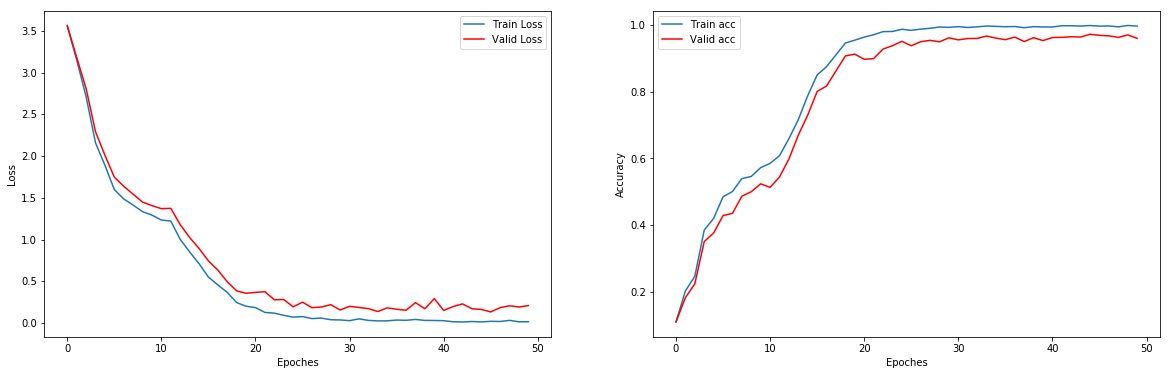

In [26]:
file_path = 'output_images/rgb_acc.jpg'
display_loss_and_acc(rgb_train_loss, rgb_valid_loss, rgb_train_acc, rgb_valid_acc, file_path)

### Training for Normalization images

In [27]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

#Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32)
#keep_prob_fully = tf.placeholder(tf.float32, name='keep_prob_fully')
one_hot_y = tf.one_hot(y, 43)

# Model
learning_rate = 0.001
logits = leNet_1(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
#logits = tf.identity(logits, name='logits')

# Loss 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
predict= tf.argmax(logits, 1) 
label = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predict, label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

saver = tf.train.Saver()

In [28]:
# Training the model

save_file= './normal_model'
EPOCHS = 50
BATCH_SIZE = 128
normal_train_loss, normal_train_acc, normal_valid_loss, normal_valid_acc = [], [], [], []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_normal, y_train_normal = shuffle(X_train_normal, y_train_normal)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normal[offset:end], y_train_normal[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            
        train_loss = sess.run(loss_operation, feed_dict={x:X_train_normal, y:y_train_normal, keep_prob: 1.0})
        normal_train_loss.append(train_loss)
        train_accuracy = evaluate(X_train_normal, y_train_normal)
        normal_train_acc.append(train_accuracy)
        valid_loss = sess.run(loss_operation, feed_dict={x:X_valid_normal, y:y_valid, keep_prob: 1.0})
        normal_valid_loss.append(valid_loss)
        valid_accuracy = evaluate(X_valid_normal, y_valid)
        normal_valid_acc.append(valid_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Loss = {:.3f} Train Accuracy = {:.3f}".format(train_loss, train_accuracy))
        print("Validation Loss = {} Validation Accuracy = {:.3f}".format(valid_loss, valid_accuracy))
        
        print()
    
   
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Train Loss = 3.401 Train Accuracy = 0.159
Validation Loss = 3.47587251663208 Validation Accuracy = 0.130

EPOCH 2 ...
Train Loss = 2.752 Train Accuracy = 0.334
Validation Loss = 2.930307149887085 Validation Accuracy = 0.239

EPOCH 3 ...
Train Loss = 2.076 Train Accuracy = 0.487
Validation Loss = 2.3105673789978027 Validation Accuracy = 0.371

EPOCH 4 ...
Train Loss = 1.630 Train Accuracy = 0.566
Validation Loss = 1.9096894264221191 Validation Accuracy = 0.465

EPOCH 5 ...
Train Loss = 1.337 Train Accuracy = 0.673
Validation Loss = 1.6487891674041748 Validation Accuracy = 0.557

EPOCH 6 ...
Train Loss = 1.172 Train Accuracy = 0.746
Validation Loss = 1.4513485431671143 Validation Accuracy = 0.637

EPOCH 7 ...
Train Loss = 1.011 Train Accuracy = 0.766
Validation Loss = 1.3342258930206299 Validation Accuracy = 0.634

EPOCH 8 ...
Train Loss = 0.873 Train Accuracy = 0.827
Validation Loss = 1.171722650527954 Validation Accuracy = 0.705

EPOCH 9 ...
Train Loss = 0.732 

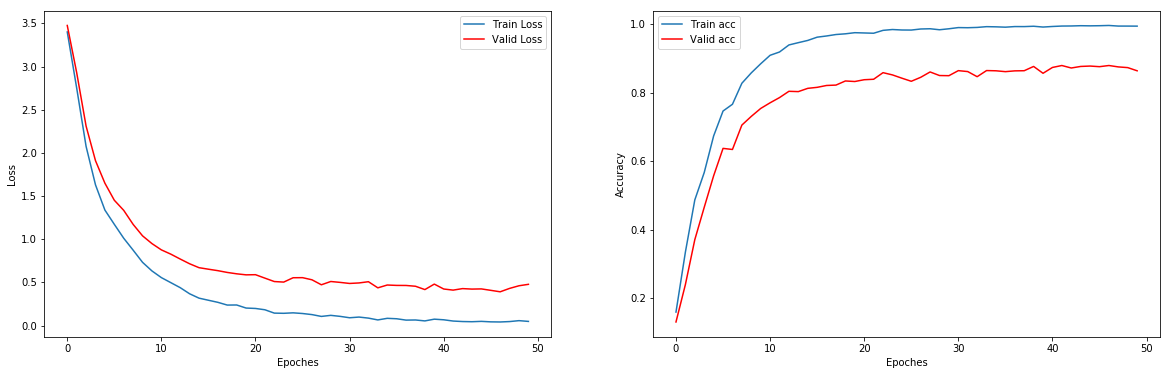

In [29]:
file_path= 'output_images/normal_acc.jpg'
display_loss_and_acc(normal_train_loss, normal_valid_loss, normal_train_acc, normal_valid_acc, file_path)

### Training for Grayscale images

In [30]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

#Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32)
#keep_prob_fully = tf.placeholder(tf.float32, name='keep_prob_fully')
one_hot_y = tf.one_hot(y, 43)

# Model
learning_rate = 0.001
logits = leNet_1(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
predict= tf.argmax(logits, 1) 
label = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predict, label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

saver = tf.train.Saver()

In [31]:
# Training the model

save_file= './gray_model'
EPOCHS = 50
BATCH_SIZE = 128
gray_train_loss, gray_train_acc, gray_valid_loss, gray_valid_acc = [], [], [], []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train_gray = shuffle(X_train_gray, y_train_gray)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train_gray[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
            
        train_loss = sess.run(loss_operation, feed_dict={x:X_train_gray, y:y_train_gray, keep_prob: 1.0})
        gray_train_loss.append(train_loss)
        train_accuracy = evaluate(X_train_gray, y_train_gray)
        #print(X_train.shape)
        gray_train_acc.append(train_accuracy)
        valid_loss = sess.run(loss_operation, feed_dict={x:X_valid_gray, y:y_valid, keep_prob: 1.0})
        gray_valid_loss.append(valid_loss)
        valid_accuracy = evaluate(X_valid_gray, y_valid)
        gray_valid_acc.append(valid_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Loss = {} Validation Accuracy = {:.3f}".format(valid_loss, valid_accuracy))
        
        print()

   
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.154
Validation Loss = 3.4622929096221924 Validation Accuracy = 0.133

EPOCH 2 ...
Train Accuracy = 0.330
Validation Loss = 2.700641632080078 Validation Accuracy = 0.275

EPOCH 3 ...
Train Accuracy = 0.462
Validation Loss = 2.0868139266967773 Validation Accuracy = 0.397

EPOCH 4 ...
Train Accuracy = 0.634
Validation Loss = 1.528287649154663 Validation Accuracy = 0.585

EPOCH 5 ...
Train Accuracy = 0.698
Validation Loss = 1.2349039316177368 Validation Accuracy = 0.663

EPOCH 6 ...
Train Accuracy = 0.796
Validation Loss = 0.9628196954727173 Validation Accuracy = 0.760

EPOCH 7 ...
Train Accuracy = 0.874
Validation Loss = 0.6892157793045044 Validation Accuracy = 0.822

EPOCH 8 ...
Train Accuracy = 0.912
Validation Loss = 0.5624608993530273 Validation Accuracy = 0.864

EPOCH 9 ...
Train Accuracy = 0.947
Validation Loss = 0.4117104113101959 Validation Accuracy = 0.892

EPOCH 10 ...
Train Accuracy = 0.967
Validation Loss = 0.3461838364601135 Validat

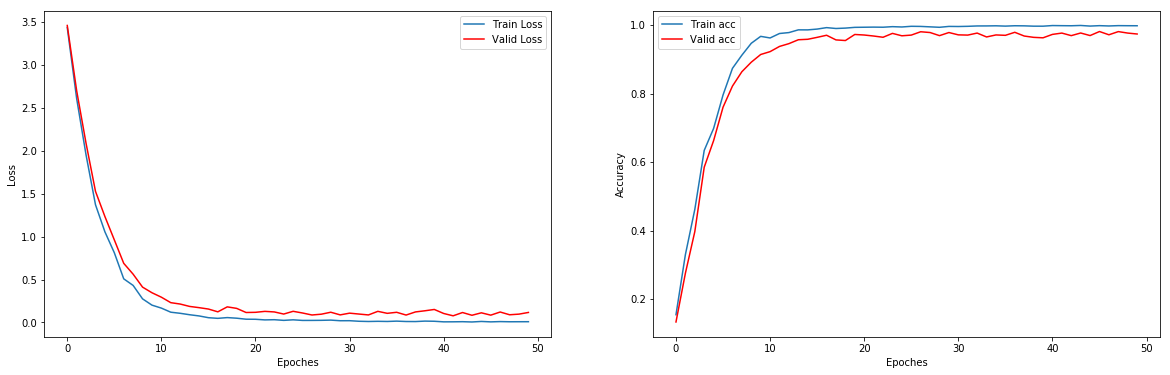

In [32]:
file_path= 'output_images/gray_acc.jpg'
display_loss_and_acc(gray_train_loss, gray_valid_loss, gray_train_acc, gray_valid_acc, file_path)

In [33]:
saver = tf.train.Saver()
save_file = './gray_model'
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    gray_test_accuracy = sess.run(
        accuracy_operation,
        feed_dict={x: X_test_gray, y: y_test, keep_prob: 1.0})

print('Test Accuracy: {}'.format(gray_test_accuracy))

INFO:tensorflow:Restoring parameters from ./gray_model
Test Accuracy: 0.9610456228256226


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [34]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [45]:
def display_all_acc(data1, data2, data3, file_path):
    
    X = np.arange(0, len(data1))
    f, (ax1) = plt.subplots(1, 1, figsize=(18, 10))
    
    f.suptitle('Accuracy of the LeNet_1 on difference datasets', fontsize=18, y=0.93)
    
    l1, = ax1.plot(X, data1)
    l2, = ax1.plot(X, data2, color='red')
    l3, = ax1.plot(X, data3, color='green')
    
    ax1.set_xlabel('Epoches')
    ax1.set_ylabel('Accuracy')
    ax1.legend(handles=[l1, l2, l3], labels=['RGB acc', 'Normal acc', 'Gray acc'],  loc='best')
   
    f.savefig(file_path)
    

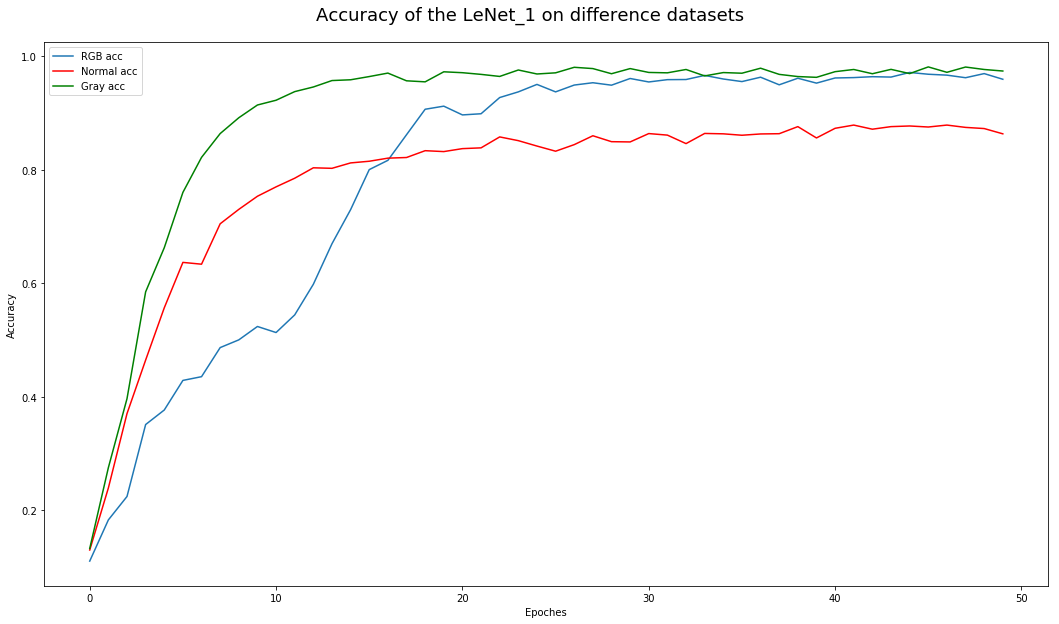

In [46]:
file_path = 'output_images/all_acc.jpg'
display_all_acc(rgb_valid_acc, normal_valid_acc, gray_valid_acc, file_path)

**Change the parameters of the Dropout layer to reduce over fitting of the model.**

In [47]:
#################################################################
# Buliding Model leNet_2() which have difference keep_prob rates;
################################################################

def leNet_2(x, keep_prob_conv2d, keep_prob_fully):
    
    conv1 = conv2d_layer(x, output_dim=32, conv_ksize=(3, 3))
    conv1 = tf.nn.dropout(conv1, keep_prob_conv2d)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2 = conv2d_layer(conv1, output_dim=64, conv_ksize=(3, 3))
    conv2 = tf.nn.dropout(conv2, keep_prob_conv2d)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv3 = conv2d_layer(conv2, output_dim=128, conv_ksize=(3, 3))
    conv3 = tf.nn.dropout(conv3, keep_prob_conv2d)
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    fc0   = flatten(conv3)
    
    fc1   = fully_layer(fc0, output_dim=256)
    fc1   = tf.nn.dropout(fc1, keep_prob_fully)
    fc1   = tf.nn.relu(fc1)
    
    fc2   = fully_layer(fc1, output_dim=128)
    fc2   = tf.nn.dropout(fc2, keep_prob_fully)
    fc2   = tf.nn.relu(fc2)
    
    logits  = fully_layer(fc2, output_dim=43)
    
    return logits

#Model evaluate
def evaluate_2(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples    

In [50]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

#Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob_conv2d = tf.placeholder(tf.float32, name='keep_prob_conv2d')
keep_prob_fully = tf.placeholder(tf.float32, name='keep_prob_fully')
one_hot_y = tf.one_hot(y, 43)

# Model
learning_rate = 0.001
logits = leNet_2(x, keep_prob_conv2d, keep_prob_fully)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
predict= tf.argmax(logits, 1) 
label = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predict, label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

saver = tf.train.Saver()

In [51]:
# Training the model
save_file= './final_model'
EPOCHS = 100
BATCH_SIZE = 128
final_train_loss, final_train_acc, final_valid_loss, final_valid_acc = [], [], [], []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train_gray = shuffle(X_train_gray, y_train_gray)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train_gray[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv2d: 0.75, keep_prob_fully: 0.5})
            
        train_loss = sess.run(loss_operation, feed_dict={x:X_train_gray, y:y_train_gray, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})
        final_train_loss.append(train_loss)
        train_accuracy = evaluate_2(X_train_gray, y_train_gray)
        final_train_acc.append(train_accuracy)
        valid_loss = sess.run(loss_operation, feed_dict={x:X_valid_gray, y:y_valid, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})
        final_valid_loss.append(valid_loss)
        valid_accuracy = evaluate_2(X_valid_gray, y_valid)
        final_valid_acc.append(valid_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Loss = {:.3f} Train Accuracy = {:.3f}".format(train_loss, train_accuracy))
        print("Validation Loss = {:.3f} Validation Accuracy = {:.3f}".format(valid_loss, valid_accuracy))
        
        print()
    
    gray_predictions = sess.run(predict, feed_dict = {x: X_valid_gray, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})
    gray_labels = sess.run(label, feed_dict = {y: y_valid})
   
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Train Loss = 3.530 Train Accuracy = 0.126
Validation Loss = 3.559 Validation Accuracy = 0.116

EPOCH 2 ...
Train Loss = 3.342 Train Accuracy = 0.159
Validation Loss = 3.403 Validation Accuracy = 0.161

EPOCH 3 ...
Train Loss = 3.075 Train Accuracy = 0.244
Validation Loss = 3.158 Validation Accuracy = 0.231

EPOCH 4 ...
Train Loss = 2.799 Train Accuracy = 0.315
Validation Loss = 2.875 Validation Accuracy = 0.278

EPOCH 5 ...
Train Loss = 2.381 Train Accuracy = 0.376
Validation Loss = 2.493 Validation Accuracy = 0.318

EPOCH 6 ...
Train Loss = 2.125 Train Accuracy = 0.399
Validation Loss = 2.237 Validation Accuracy = 0.347

EPOCH 7 ...
Train Loss = 1.996 Train Accuracy = 0.440
Validation Loss = 2.105 Validation Accuracy = 0.390

EPOCH 8 ...
Train Loss = 1.739 Train Accuracy = 0.445
Validation Loss = 1.868 Validation Accuracy = 0.381

EPOCH 9 ...
Train Loss = 1.579 Train Accuracy = 0.528
Validation Loss = 1.710 Validation Accuracy = 0.461

EPOCH 10 ...
Train Loss 

EPOCH 78 ...
Train Loss = 0.015 Train Accuracy = 0.997
Validation Loss = 0.087 Validation Accuracy = 0.978

EPOCH 79 ...
Train Loss = 0.024 Train Accuracy = 0.994
Validation Loss = 0.114 Validation Accuracy = 0.970

EPOCH 80 ...
Train Loss = 0.021 Train Accuracy = 0.995
Validation Loss = 0.097 Validation Accuracy = 0.973

EPOCH 81 ...
Train Loss = 0.013 Train Accuracy = 0.997
Validation Loss = 0.103 Validation Accuracy = 0.971

EPOCH 82 ...
Train Loss = 0.014 Train Accuracy = 0.996
Validation Loss = 0.110 Validation Accuracy = 0.972

EPOCH 83 ...
Train Loss = 0.024 Train Accuracy = 0.993
Validation Loss = 0.137 Validation Accuracy = 0.963

EPOCH 84 ...
Train Loss = 0.010 Train Accuracy = 0.999
Validation Loss = 0.081 Validation Accuracy = 0.984

EPOCH 85 ...
Train Loss = 0.012 Train Accuracy = 0.997
Validation Loss = 0.093 Validation Accuracy = 0.974

EPOCH 86 ...
Train Loss = 0.010 Train Accuracy = 0.998
Validation Loss = 0.099 Validation Accuracy = 0.975

EPOCH 87 ...
Train Loss = 0.

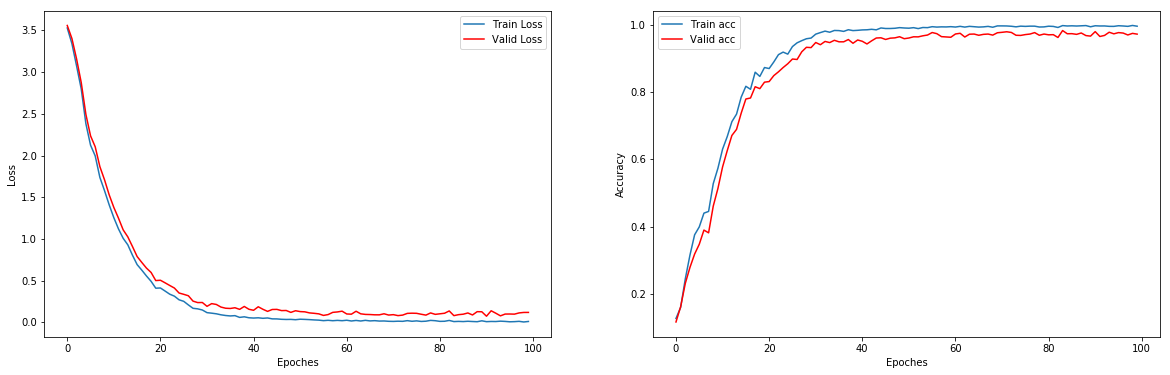

In [52]:
file_path = 'output_images/final.jpg'
display_loss_and_acc(final_train_loss, final_valid_loss, final_train_acc, final_valid_acc, file_path)

In [53]:
saver = tf.train.Saver()
save_file = './final_model'
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    final_test_accuracy = sess.run(
        accuracy_operation,
        feed_dict={x: X_test_gray, y: y_test, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})

print('Test Accuracy: {}'.format(final_test_accuracy))

INFO:tensorflow:Restoring parameters from ./final_model
Test Accuracy: 0.9561367034912109


In [118]:
ERRORS = gray_predictions != gray_labels
    
bad_predict_imgs = X_valid[ERRORS]
bad_predict_labels = y_valid[ERRORS]

In [105]:
def display_bad_imgs(bad_predict_imgs, bad_predict_labels, X_label, file_path):
    
    
    fig, axies = plt.subplots(nrows=5, ncols=5, figsize=(20, 10))
    
    fig.tight_layout()
    fig.suptitle('Misclassified images', fontsize=20, y=1.05)
    
    id = 0
    for row in range(5):
        id += row
        for col in range(5):

            axies[row][col].imshow(bad_predict_imgs[id])
            axies[row][col].set_title(X_label[bad_predict_labels[id]])
            id += 1
    fig.savefig(file_path, bbox_inches = 'tight')

#### Display bad images.

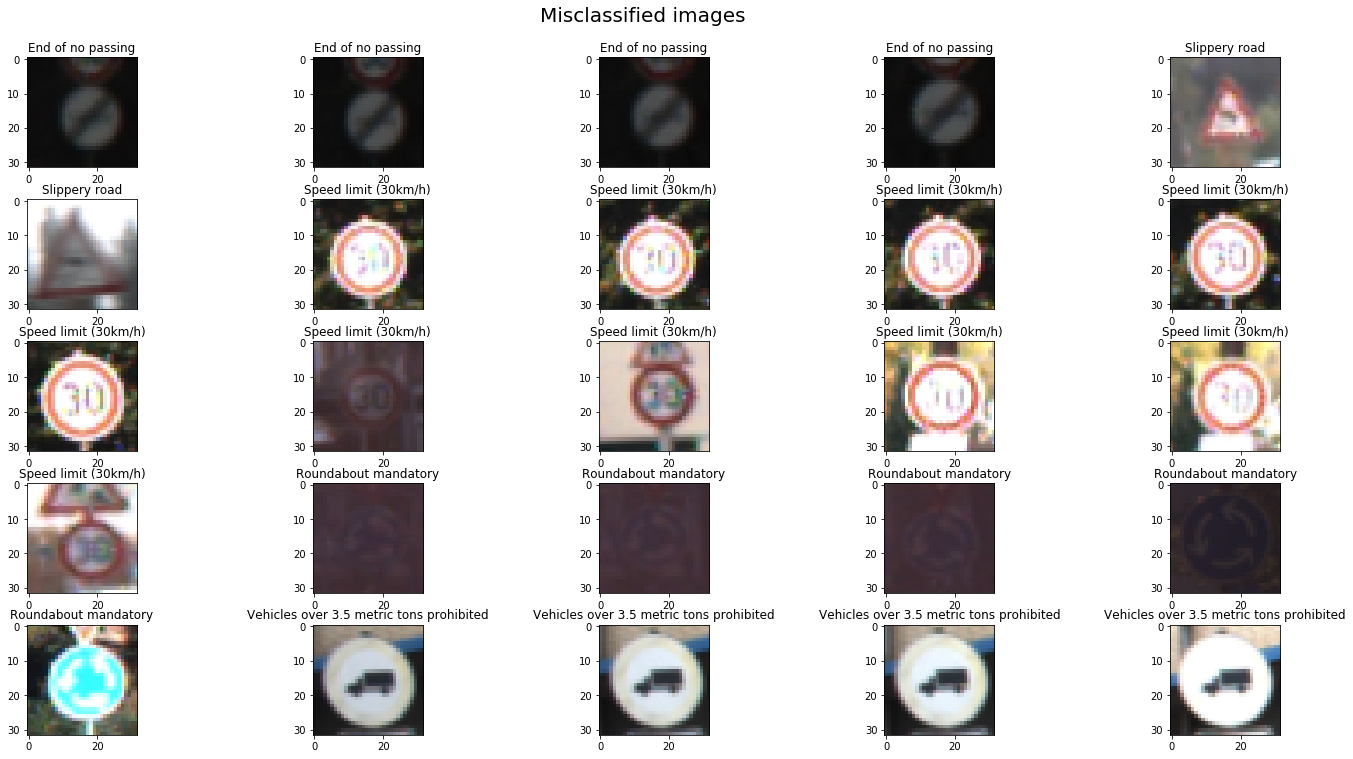

In [106]:
file_path= 'output_images/misclassified_gray.jpg'
display_bad_imgs(bad_predict_imgs, bad_predict_labels, X_label, file_path)

### Training for  Histogram Equalization images.

In [140]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

#Inputs
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob_conv2d = tf.placeholder(tf.float32, name='keep_prob_conv2d')
keep_prob_fully = tf.placeholder(tf.float32, name='keep_prob_fully')
one_hot_y = tf.one_hot(y, 43)

# Model
learning_rate = 0.001
logits = leNet_2(x, keep_prob_conv2d, keep_prob_fully)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
predict= tf.argmax(logits, 1) 
label = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predict, label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

saver = tf.train.Saver()

In [141]:
# Training the model
save_file= './hist_model'
EPOCHS = 100
BATCH_SIZE = 128
hist_train_loss, hist_train_acc, hist_valid_loss, hist_valid_acc = [], [], [], []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_hist, y_train_hist = shuffle(X_train_hist, y_train_hist)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_hist[offset:end], y_train_hist[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_conv2d: 0.75, keep_prob_fully: 0.6})
            
        train_loss = sess.run(loss_operation, feed_dict={x:X_train_hist, y:y_train_hist, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})
        hist_train_loss.append(train_loss)
        train_accuracy = evaluate_2(X_train_hist, y_train_hist)
        hist_train_acc.append(train_accuracy)
        valid_loss = sess.run(loss_operation, feed_dict={x:X_valid_hist, y:y_valid, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})
        hist_valid_loss.append(valid_loss)
        valid_accuracy = evaluate_2(X_valid_hist, y_valid)
        hist_valid_acc.append(valid_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Loss = {:.3f} Train Accuracy = {:.3f}".format(train_loss, train_accuracy))
        print("Validation Loss = {:.3f} Validation Accuracy = {:.3f}".format(valid_loss, valid_accuracy))
        
        print()
    
    hist_predictions = sess.run(predict, feed_dict = {x: X_valid_hist, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})
    hist_labels = sess.run(label, feed_dict = {y: y_valid})
   
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Train Loss = 3.662 Train Accuracy = 0.057
Validation Loss = 3.676 Validation Accuracy = 0.054

EPOCH 2 ...
Train Loss = 3.580 Train Accuracy = 0.057
Validation Loss = 3.611 Validation Accuracy = 0.054

EPOCH 3 ...
Train Loss = 3.459 Train Accuracy = 0.096
Validation Loss = 3.514 Validation Accuracy = 0.084

EPOCH 4 ...
Train Loss = 3.108 Train Accuracy = 0.177
Validation Loss = 3.208 Validation Accuracy = 0.143

EPOCH 5 ...
Train Loss = 2.515 Train Accuracy = 0.291
Validation Loss = 2.615 Validation Accuracy = 0.261

EPOCH 6 ...
Train Loss = 2.238 Train Accuracy = 0.341
Validation Loss = 2.359 Validation Accuracy = 0.306

EPOCH 7 ...
Train Loss = 1.956 Train Accuracy = 0.400
Validation Loss = 2.037 Validation Accuracy = 0.368

EPOCH 8 ...
Train Loss = 1.788 Train Accuracy = 0.456
Validation Loss = 1.869 Validation Accuracy = 0.425

EPOCH 9 ...
Train Loss = 1.592 Train Accuracy = 0.465
Validation Loss = 1.683 Validation Accuracy = 0.424

EPOCH 10 ...
Train Loss 

EPOCH 77 ...
Train Loss = 0.017 Train Accuracy = 0.997
Validation Loss = 0.077 Validation Accuracy = 0.981

EPOCH 78 ...
Train Loss = 0.014 Train Accuracy = 0.998
Validation Loss = 0.087 Validation Accuracy = 0.977

EPOCH 79 ...
Train Loss = 0.020 Train Accuracy = 0.996
Validation Loss = 0.128 Validation Accuracy = 0.969

EPOCH 80 ...
Train Loss = 0.021 Train Accuracy = 0.997
Validation Loss = 0.090 Validation Accuracy = 0.977

EPOCH 81 ...
Train Loss = 0.022 Train Accuracy = 0.996
Validation Loss = 0.101 Validation Accuracy = 0.974

EPOCH 82 ...
Train Loss = 0.011 Train Accuracy = 0.998
Validation Loss = 0.077 Validation Accuracy = 0.980

EPOCH 83 ...
Train Loss = 0.012 Train Accuracy = 0.997
Validation Loss = 0.095 Validation Accuracy = 0.978

EPOCH 84 ...
Train Loss = 0.014 Train Accuracy = 0.998
Validation Loss = 0.099 Validation Accuracy = 0.979

EPOCH 85 ...
Train Loss = 0.017 Train Accuracy = 0.997
Validation Loss = 0.116 Validation Accuracy = 0.973

EPOCH 86 ...
Train Loss = 0.

In [142]:
saver = tf.train.Saver()
save_file = './hist_model'
# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    final_test_accuracy = sess.run(
        accuracy_operation,
        feed_dict={x: X_test_hist, y: y_test, keep_prob_conv2d: 1.0, keep_prob_fully: 1.0})

print('Test Accuracy: {}'.format(final_test_accuracy))

INFO:tensorflow:Restoring parameters from ./hist_model
Test Accuracy: 0.9547115564346313


In [136]:
H_ERRORS = hist_predictions != hist_labels
    
hist_predict_imgs = X_valid[ERRORS]
hist_predict_labels = y_valid[ERRORS]

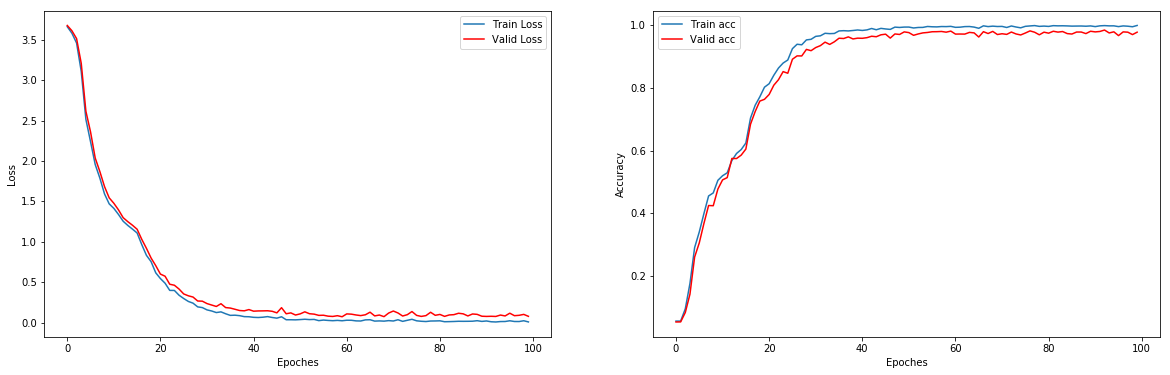

In [144]:
file_path = 'output_images/hist.jpg'
display_loss_and_acc(hist_train_loss, hist_valid_loss, hist_train_acc, hist_valid_acc, file_path)

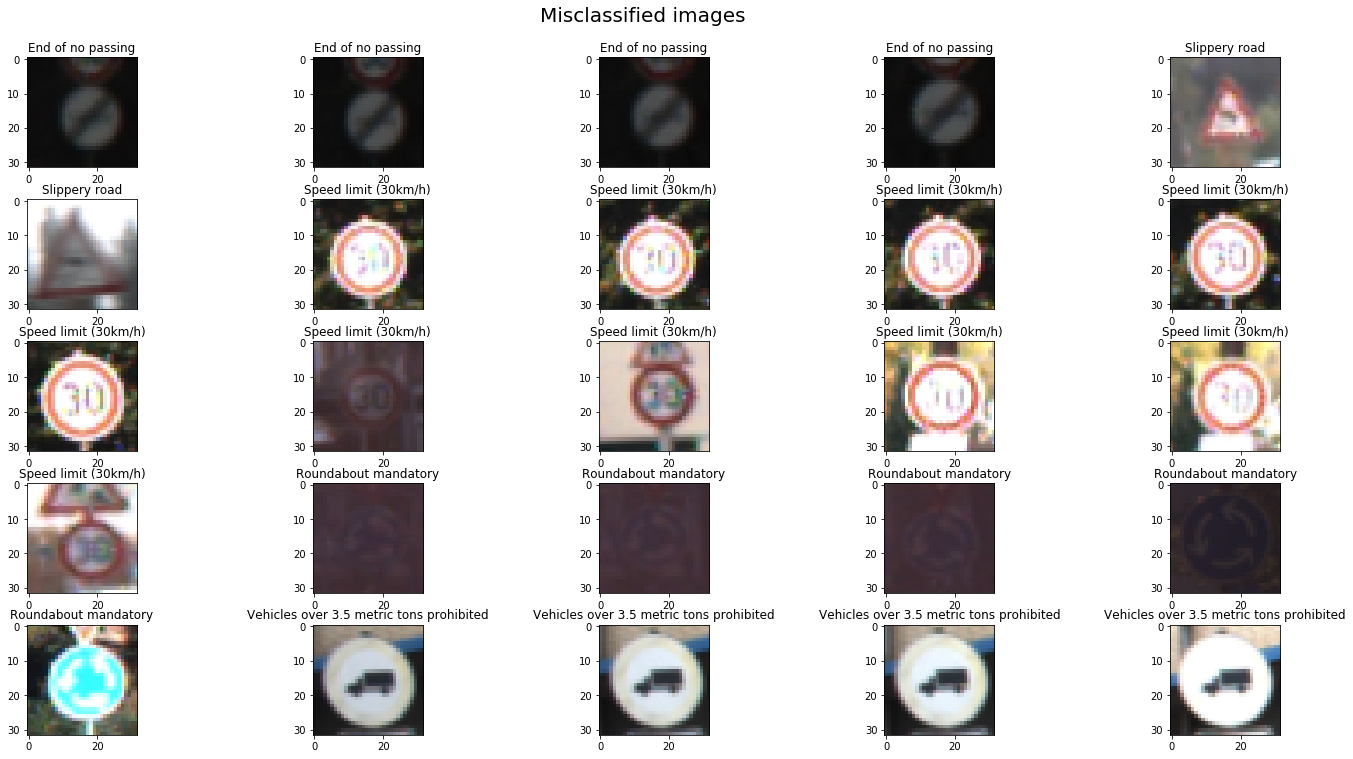

In [145]:
file_path= 'output_images/misclassified_hist.jpg'
display_bad_imgs(hist_predict_imgs, hist_predict_labels, X_label, file_path)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [47]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
random_data = np.random.choice(len(X_test_gray), 5)

In [48]:
init_img = [X_test[id] for id in random_data]
init_label = [y_test[id] for id in random_data]

In [70]:
def display_test_imgs(imgs, label, X_label, file_path):
    
    fig, axies = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
    
    for id in range(5):
        
        axies[id].imshow(imgs[id])
        axies[id].set_title(X_label[label[id]])
        
    fig.savefig(file_path, bbox_inches = 'tight')

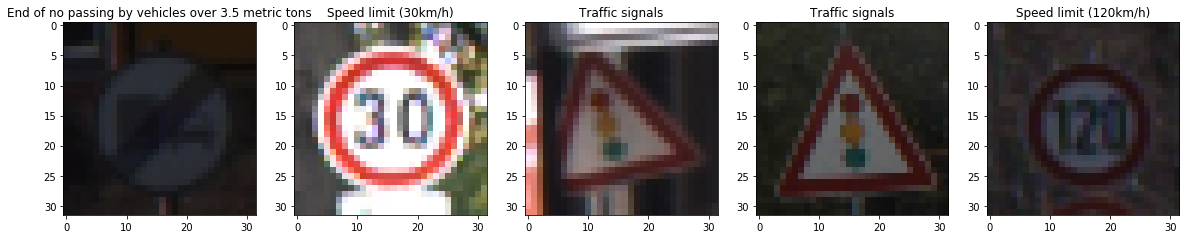

In [71]:
file_path='output_images/init_test_imgs.jpg'
display_test_imgs(init_img, init_label, X_label, file_path)

#### Agument data

Reduced the brightness of the initial images.


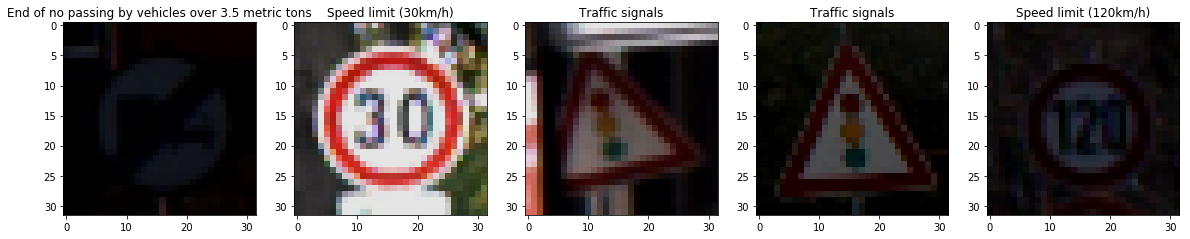

In [72]:
file_path = 'output_images/augment_test_imgs.jpg'
with tf.Session() as sess:
    img_data = np.array(init_img)
    adjusted1 = tf.image.adjust_brightness(img_data,-0.1)
    adjusted1_data = adjusted1.eval()
    display_test_imgs(adjusted1_data, init_label, X_label, file_path)

In [52]:
test_gray = np.array([to_gray2rgb(img)[:,:, np.newaxis] for img in adjusted1_data])

### Predict the Sign Type for Each Image

In [53]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [62]:
save_model_path = 'final_model'
top_n_predictions = 5

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = test_gray, init_label
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob_conv2d = loaded_graph.get_tensor_by_name('keep_prob_conv2d:0')
        loaded_keep_prob_fully = loaded_graph.get_tensor_by_name('keep_prob_fully:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        
        test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: test_features, loaded_y: test_labels, loaded_keep_prob_conv2d: 1.0, loaded_keep_prob_fully: 1.0})
    
    return test_predictions


In [63]:
def display_image_predictions(features, labels, predictions, X_label, path_file):
    n_classes = 43
    
    fig, axies = plt.subplots(nrows=5, ncols=2, figsize=(10, 10))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 5
    margin = 0.01
    ind = np.arange(n_predictions)
    width = 0.5

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, labels, predictions.indices, predictions.values)):
        pred_names = [X_label[pred_i] for pred_i in pred_indicies]
        correct_name = X_label[label_id]

        axies[image_i][0].imshow(feature.reshape(32, 32))
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()
        
        np.set_printoptions(suppress=True)
        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])
        
    fig.savefig(path_file)

In [64]:
test_predictions = test_model()

INFO:tensorflow:Restoring parameters from final_model


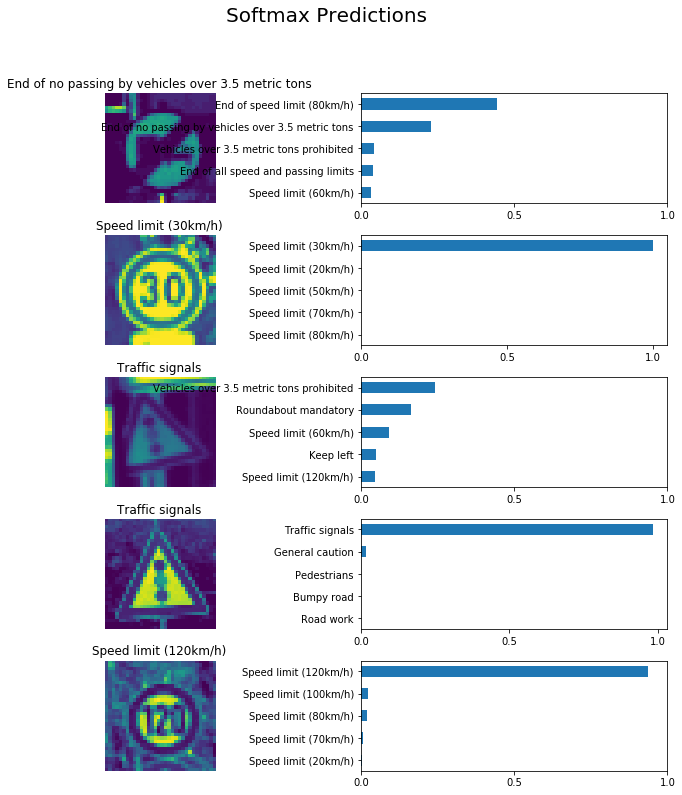

In [65]:
file_path = 'output_images/test_prediction.jpg'
display_image_predictions(test_gray, init_label, test_predictions, X_label, file_path)

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

####  Calculate the accuracy for these 5 new images.   
the model predicted 3 out of 5 signs correctly, it's 60% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [66]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

test_predictions.values

array([[ 0.44509766,  0.22979762,  0.04359803,  0.03850016,  0.03344189],
       [ 0.99999881,  0.00000074,  0.0000004 ,  0.        ,  0.        ],
       [ 0.24288301,  0.16486575,  0.09321691,  0.05057452,  0.04492846],
       [ 0.98256624,  0.0164821 ,  0.00043213,  0.00017723,  0.00009901],
       [ 0.9372071 ,  0.02225557,  0.0193257 ,  0.00805154,  0.00443336]], dtype=float32)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")